In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import os
import sqlite3
%matplotlib inline
import plotly.express as px
from plotly import graph_objs as go
import plotly.figure_factory as ff
from time import gmtime, strftime

# Model
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import tensorflow as tf
# Keras specific
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

import toolkit as tool

import os

os.system('date')

2023-12-11 23:11:59.139728: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-11 23:11:59.299785: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-11 23:11:59.299804: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-11 23:12:00.014125: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

seg 11 dez 2023 23:12:00 -03


0

### Objective

The data is for company X which is trying to control attrition. There are two sets of data: “Existing employees” and “Employees who have left”. Following attributes are available for every employee.
 - Satisfaction Level
 - Last evaluation
 - Number of projects
 - Average monthly hours
 - Time spent at the company
 - Whether they have had a work accident
 - Whether they have had a promotion in the last 5 years
 - Departments (column sales)
 - Salary
 - Whether the employee has left

In [2]:
# loading dataset.
df = pd.read_csv('../datasets/HR_COM1_tomodel.csv')
df.head(100)

,Emp ID,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,dept,salary
0,1,0.38,0.53,2,157,3,0,1,0,7,1
1,2,0.80,0.86,5,262,6,0,1,0,7,2
2,3,0.11,0.88,7,272,4,0,1,0,7,2
3,4,0.72,0.87,5,223,5,0,1,0,7,1
4,5,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.37,0.51,2,155,3,0,1,0,7,1
96,97,0.10,0.77,6,265,4,0,1,0,7,1
97,98,0.10,0.84,6,279,4,0,1,0,7,1
98,99,0.11,0.97,6,284,4,0,1,0,7,1


In [3]:
print(df['dept'].value_counts(normalize=True).map('{:.2%}'.format))

7    27.60%
9    18.13%
8    14.86%
0     8.18%
6     6.01%
5     5.72%
1     5.25%
2     5.11%
3     4.93%
4     4.20%
Name: dept, dtype: object


In [4]:
df.promotion.min()

0

In [5]:
shape_rows = df.shape[0]
shape_columns = df.shape[1]

print(f'Dataset rows = {shape_rows} and columns = {shape_columns}.')

Dataset rows = 14999 and columns = 11.


### X and y 

In [6]:
# Set the input X to the K-Means.
X = df.drop(columns=['turnover', 'Emp ID'])
y = df['turnover']

In [7]:
# Method of inertia to find the ideal of clusters.
inertia = []
for k in range(1, 11):
    clf = KMeans(n_clusters = k , random_state= 123)
    clf.fit(X)
    inertia.append(clf.inertia_)

In [8]:
pd.DataFrame({"k":list(range(1 , 11)),
              "inércia": inertia})

,k,inércia
0,1,3.759731e+07
1,2,8.982092e+06
2,3,4.520220e+06
3,4,2.909351e+06
4,5,2.096935e+06
5,6,1.567737e+06
6,7,1.256145e+06
7,8,9.821504e+05
8,9,7.868616e+05
9,10,6.740358e+05


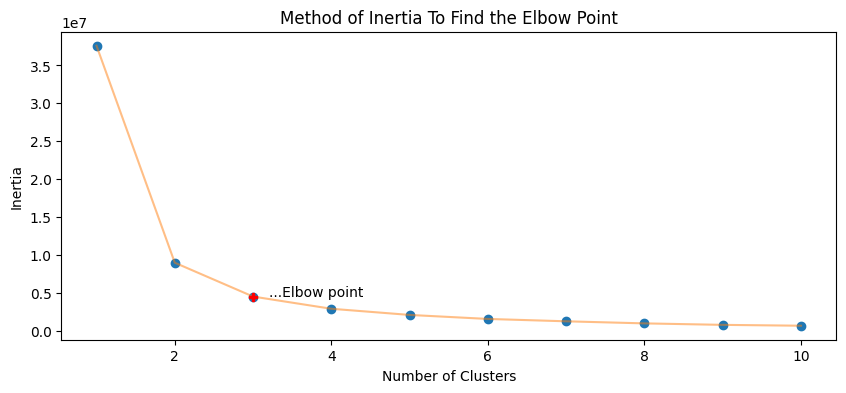

In [9]:
plt.figure(1 , figsize = (10 ,4))
plt.title('Method of Inertia To Find the Elbow Point')
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.text(3 + 0.2 , inertia[2] , '...Elbow point')

plt.show()

In [10]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

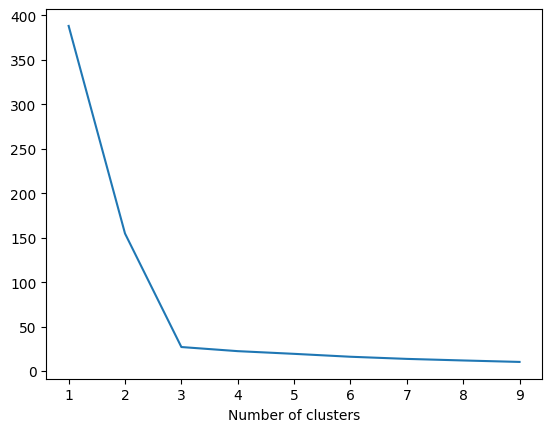

In [11]:
# Determine number of clusters with K-means elbow method
# The arc of the elbow shows that number 3 is our best fit and as thus we would create  3 clusters of employee
sse={}
br = df[df.turnover==1][["satisfaction","evaluation"]]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df[df.turnover==1][["satisfaction","evaluation"]])

    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.show()

In [12]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=df["satisfaction"], y=df["evaluation"],
    mode='markers',
    marker=dict(
        color= kmeans_colors,
        opacity=[1, 0.8, 0.6, 0.4],
        size=[40, 60, 80, 100],
    )
)])
fig.update_layout(title_text='Employee Cluster Chart')
fig.show()

### Train and Test features

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123, stratify=y, shuffle = True)

### Modeling

In [14]:
modelname = 'model'

dfmetrics = pd.DataFrame()

def metric_models(modelname, model, X_test, y_test, y_pred, dfmetrics):
    acc   = round(accuracy_score(y_test,y_pred), 3)*100
    score = round(metrics.precision_score(y_test, y_pred, average='macro')*100, 2)
    mae   = round(mean_absolute_error(y_test, y_pred), 5)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    auc = round((metrics.roc_auc_score(y_test, y_pred_proba))*100, 2)

    modelmetrics = {'model': f'{modelname}',
                    'accuracy': acc,
                    'score': score,
                    'mae': mae,
                    'auc': auc   
                   }

    dfmodelmetrics = pd.DataFrame([modelmetrics])
    dfmetrics = pd.concat([dfmetrics if not dfmetrics.empty else None, dfmodelmetrics ], ignore_index=True)

    print(f'{modelname} model:')
    print(f"accuracy........:{acc}%")
    print(f'score...........:{score}')
    print(f"Mean Absolute Error: {mae}")
    print(f"Area under curve (AUC): {auc} %")

    return dfmetrics

In [15]:
def plot_conf_matrix(y_test, y_pred):
    confusion_matrix1 = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix1).plot()
    plt.grid(False)
    plt.show()

#### Logistic Regression V.S. Random Forest V.S. Decision Tree V.S. AdaBoost Model


In [16]:
lgb_model = lgb.LGBMClassifier()

# Train the model
lgb_model.fit(X_train, y_train)

# predict the results
y_pred_lgb=lgb_model.predict(X_test)

print ("\n\n ---LGBMClassifier Model---")
lgb_roc_auc = roc_auc_score(y_test, y_pred_lgb)
print ("LGBMClassifier AUC = %2.2f" % lgb_roc_auc)
print(classification_report(y_test, y_pred_lgb))



 ---LGBMClassifier Model---
LGBMClassifier AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.96      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [17]:
dfmetrics = metric_models('LightGBMClassifier', lgb_model, X_test, y_test, y_pred_lgb, dfmetrics)
dfmetrics

LightGBMClassifier model:
accuracy........:98.6%
score...........:98.34
Mean Absolute Error: 0.014
Area under curve (AUC): 99.55 %


,model,accuracy,score,mae,auc
0,LightGBMClassifier,98.6,98.34,0.014,99.55


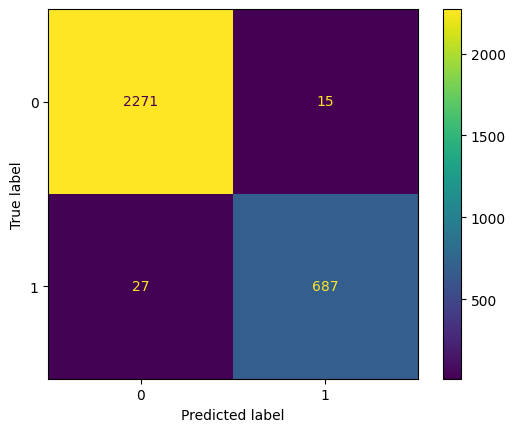

In [18]:
plot_conf_matrix(y_test, y_pred_lgb)

In [19]:
# Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=10000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced",
    n_jobs=-1
    #min_weight_fraction_leaf=0.02 
    )
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, y_pred_rf))



 ---Random Forest Model---
Random Forest AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.96      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [20]:
dfmetrics = metric_models('Random Forest', rf_model, X_test, y_test, y_pred_rf, dfmetrics)
dfmetrics

Random Forest model:
accuracy........:98.9%
score...........:98.96
Mean Absolute Error: 0.01133
Area under curve (AUC): 99.46 %


,model,accuracy,score,mae,auc
0,LightGBMClassifier,98.6,98.34,0.01400,99.55
1,Random Forest,98.9,98.96,0.01133,99.46


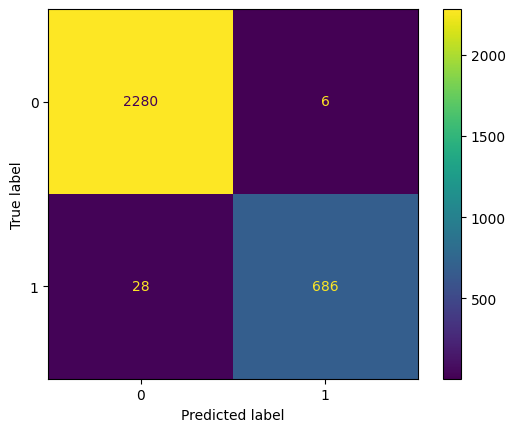

In [21]:
plot_conf_matrix(y_test, y_pred_rf)

In [22]:
list_name_features = []
index = 1

for feat, importance in zip(X.columns, rf_model.feature_importances_):
    importance = round(importance*100, 2)
    print(f'{index} - feature: {feat}, importance: {importance} %')
    list_name_features.append(feat)
    index += 1

1 - feature: satisfaction, importance: 29.55 %
2 - feature: evaluation, importance: 12.55 %
3 - feature: projectCount, importance: 15.08 %
4 - feature: averageMonthlyHours, importance: 14.72 %
5 - feature: yearsAtCompany, importance: 25.57 %
6 - feature: workAccident, importance: 0.67 %
7 - feature: promotion, importance: 0.12 %
8 - feature: dept, importance: 1.11 %
9 - feature: salary, importance: 0.63 %


In [23]:
list_feat_importances = list(rf_model.feature_importances_)
dict_feat_importances = {}
#
i=0

for ilist in list_name_features:
    dict_feat_importances[ilist] = list_feat_importances[i]*100 # porcentagem %
    print(f"{ilist}.......: {round(dict_feat_importances[ilist], 2)} %")
    i=i+1

satisfaction.......: 29.55 %
evaluation.......: 12.55 %
projectCount.......: 15.08 %
averageMonthlyHours.......: 14.72 %
yearsAtCompany.......: 25.57 %
workAccident.......: 0.67 %
promotion.......: 0.12 %
dept.......: 1.11 %
salary.......: 0.63 %


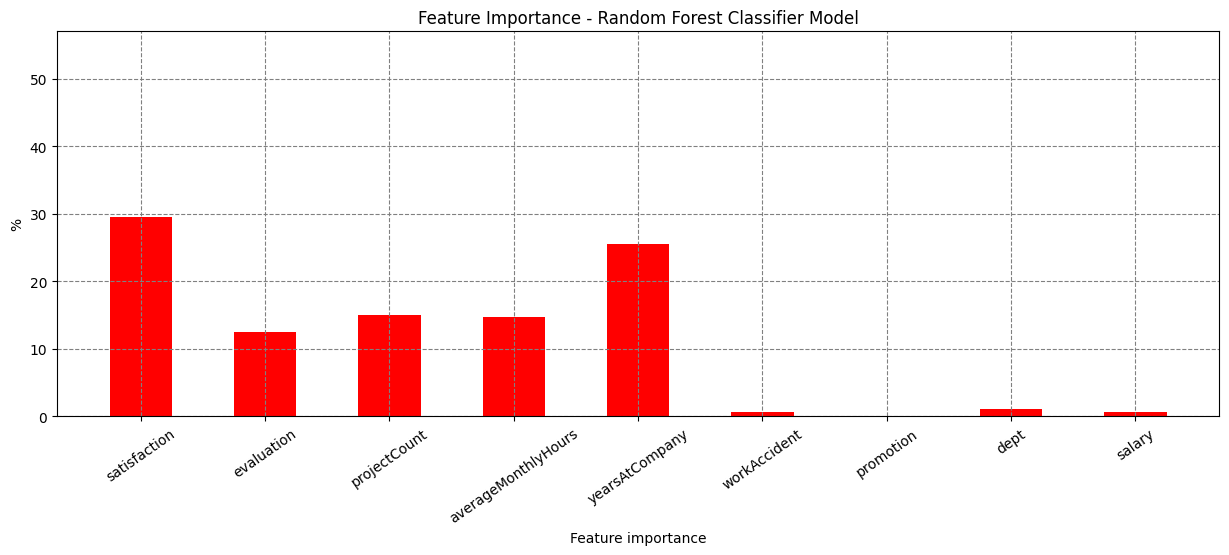

In [24]:
# feature importance
plt.figure(figsize=(15,5))
plt.bar(dict_feat_importances.keys(),dict_feat_importances.values(), width=.5, color='r')
plt.ylim(0,57)
plt.title("Feature Importance - Random Forest Classifier Model")
plt.ylabel("%")
plt.xlabel("Feature importance")
plt.xticks(rotation=35)
plt.grid(color='gray', linestyle='dashed')
plt.show()

In [25]:
# Create XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print ("\n\n ---XGBClassifier Model---")
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgb)
print ("XGBClassifier AUC = %2.2f" % xgb_roc_auc)
print(classification_report(y_test, y_pred_xgb))



 ---XGBClassifier Model---
XGBClassifier AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [26]:
dfmetrics = metric_models('XGBClassifier', xgb_model, X_test, y_test, y_pred_xgb, dfmetrics)
dfmetrics

XGBClassifier model:
accuracy........:98.9%
score...........:98.53
Mean Absolute Error: 0.01133
Area under curve (AUC): 99.55 %


,model,accuracy,score,mae,auc
0,LightGBMClassifier,98.6,98.34,0.01400,99.55
1,Random Forest,98.9,98.96,0.01133,99.46
2,XGBClassifier,98.9,98.53,0.01133,99.55


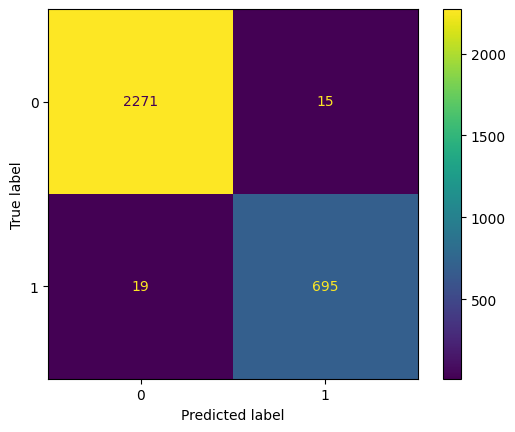

In [27]:
plot_conf_matrix(y_test, y_pred_xgb)

In [28]:
list_feat_importances = list(xgb_model.feature_importances_)
dict_feat_importances = {}
#
i=0

for ilist in list_name_features:
    dict_feat_importances[ilist] = list_feat_importances[i]*100 # porcentagem %
    print(f"{ilist}.......: {round(dict_feat_importances[ilist], 2)} %")
    i=i+1

satisfaction.......: 31.07 %
evaluation.......: 10.29 %
projectCount.......: 16.48 %
averageMonthlyHours.......: 5.19 %
yearsAtCompany.......: 24.55 %
workAccident.......: 6.2 %
promotion.......: 1.68 %
dept.......: 1.83 %
salary.......: 2.71 %


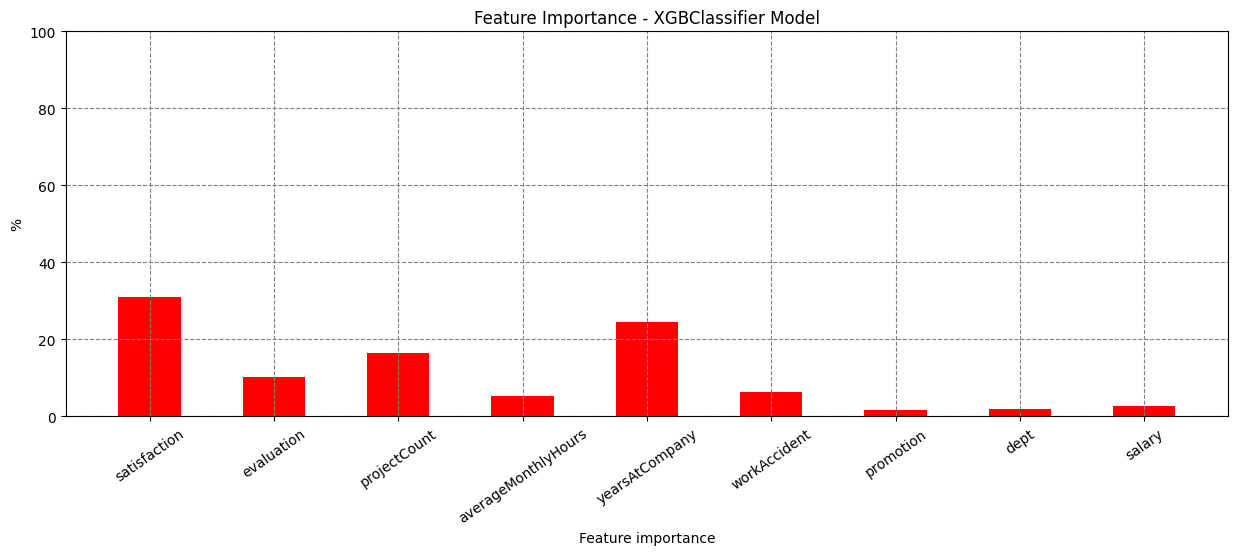

In [29]:
# feature importance
plt.figure(figsize=(15,5))
plt.bar(dict_feat_importances.keys(),dict_feat_importances.values(), width=.5, color='r')
plt.ylim(0,100)
plt.title("Feature Importance - XGBClassifier Model")
plt.ylabel("%")
plt.xlabel("Feature importance")
plt.xticks(rotation=35)
plt.grid(color='gray', linestyle='dashed')
plt.show()

In [30]:
# Create CatBoost classifier
#cat_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss', eval_metric='Accuracy')

from catboost import CatBoostClassifier, Pool

cat_model = CatBoostClassifier(
    iterations = 1000, # 1000 are ideal
    loss_function='MultiClass',
    bootstrap_type = "Bayesian",
    eval_metric = 'MultiClass',
    leaf_estimation_iterations = 100,
    random_strength = 0.5,
    depth = 7,
    l2_leaf_reg = 5,
    learning_rate=0.1,
    bagging_temperature = 0.5,
    thread_count=-1 # number of threads, setted all CPU cores
    #task_type = "GPU",
)

# Train the model
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)
y_pred_cat = cat_model.predict(X_test)

print ("\n\n ---CatBoostClassifier Model---")
cat_roc_auc = roc_auc_score(y_test, y_pred_cat)
print ("CatBoost AUC = %2.2f" % cat_roc_auc)
print(classification_report(y_test, y_pred_cat))



 ---CatBoostClassifier Model---
CatBoost AUC = 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [31]:
dfmetrics = metric_models('CatBoostClassifier', cat_model, X_test, y_test, y_pred_cat, dfmetrics)
dfmetrics

CatBoostClassifier model:
accuracy........:99.1%
score...........:98.85
Mean Absolute Error: 0.00867
Area under curve (AUC): 99.41 %


,model,accuracy,score,mae,auc
0,LightGBMClassifier,98.6,98.34,0.01400,99.55
1,Random Forest,98.9,98.96,0.01133,99.46
2,XGBClassifier,98.9,98.53,0.01133,99.55
3,CatBoostClassifier,99.1,98.85,0.00867,99.41


In [58]:
# Create a bar chart
fig = px.histogram(dfmetrics, x="model", y = "accuracy", color="model")
fig.update_layout(title_text='Accuracy for models',xaxis_title="model",
    yaxis_title="Accuracy (%)")
fig.show()

In [59]:
# Create a bar chart
fig = px.histogram(dfmetrics, x="model", y = "score", color="model")
fig.update_layout(title_text='Score for models',xaxis_title="model",
    yaxis_title="Score (%)")
fig.show()

In [60]:
# Create a bar chart
fig = px.histogram(dfmetrics, x="model", y = "mae", color="model")
fig.update_layout(title_text='Score for models',xaxis_title="model",
    yaxis_title="MAE")
fig.show()

In [61]:
# Create a bar chart
fig = px.histogram(dfmetrics, x="model", y = "auc", color="model")
fig.update_layout(title_text='AUC for models',xaxis_title="model",
    yaxis_title="AUC (%)")
fig.show()

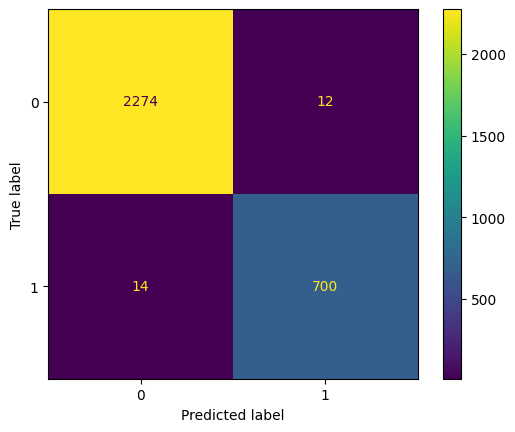

In [32]:
plot_conf_matrix(y_test, y_pred_cat)

In [33]:
list_feat_importances = list(cat_model.feature_importances_)
dict_feat_importances = {}

i=0

for ilist in list_name_features:
    dict_feat_importances[ilist] = list_feat_importances[i] # porcentagem %
    print(f"{ilist}.......: {round(dict_feat_importances[ilist], 2)} %")
    i=i+1

satisfaction.......: 23.72 %
evaluation.......: 14.81 %
projectCount.......: 11.78 %
averageMonthlyHours.......: 16.01 %
yearsAtCompany.......: 17.65 %
workAccident.......: 3.29 %
promotion.......: 0.19 %
dept.......: 7.54 %
salary.......: 5.01 %


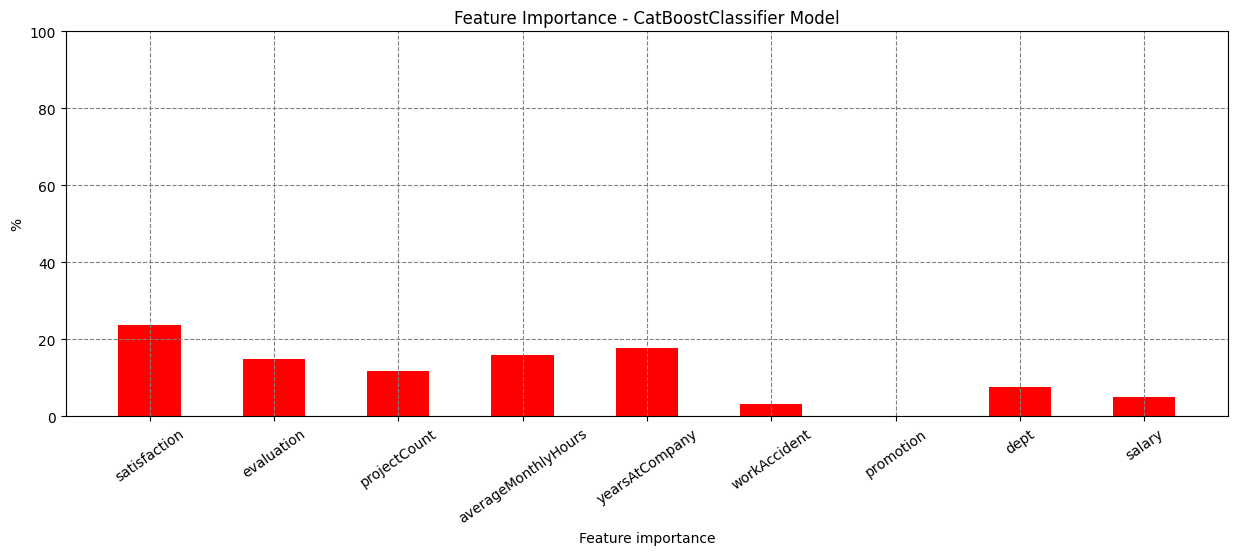

In [34]:
# feature importance
plt.figure(figsize=(15,5))
plt.bar(dict_feat_importances.keys(),dict_feat_importances.values(), width=.5, color='r')
plt.ylim(0,100)
plt.title("Feature Importance - CatBoostClassifier Model")
plt.ylabel("%")
plt.xlabel("Feature importance")
plt.xticks(rotation=35)
plt.grid(color='gray', linestyle='dashed')
plt.show()

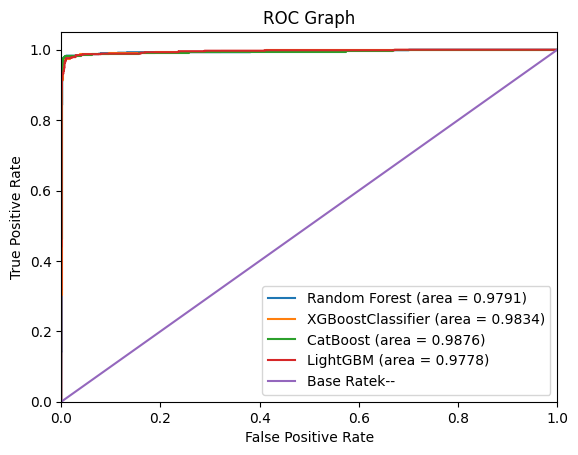

In [35]:
# Create ROC Graph
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
cat_fpr, cat_tpr, cat_thresholds = roc_curve(y_test, cat_model.predict_proba(X_test)[:,1])
lgb_fpr, lgb_tpr, lgb_thresholds = roc_curve(y_test, lgb_model.predict_proba(X_test)[:,1])

plt.figure()

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.4f)' % rf_roc_auc)

# Plot XGBoostClassifier ROC
plt.plot(xgb_fpr, xgb_tpr, label='XGBoostClassifier (area = %0.4f)' % xgb_roc_auc)

# Plot XGBoostClassifier ROC
plt.plot(cat_fpr, cat_tpr, label='CatBoost (area = %0.4f)' % cat_roc_auc)

# Plot LightGBM ROC
plt.plot(lgb_fpr, lgb_tpr, label='LightGBM (area = %0.4f)' % lgb_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")

# Save the plot as a PNG file
plt.savefig('../images/roc_curve_bestmodels.png')

plt.show()

In [36]:
os.system('date')

seg 11 dez 2023 23:14:14 -03


0

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=123, stratify=y, shuffle=True)

In [38]:
plt.style.use("seaborn-v0_8-whitegrid")
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [39]:
model = keras.Sequential([layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='sigmoid'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1),
                         ])

#model.compile(optimizer='adam', loss='mae',)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-12-11 23:14:15.075915: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-12-11 23:14:15.075947: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (master): /proc/driver/nvidia/version does not exist
2023-12-11 23:14:15.076301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
# fitting...
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=256,
                    epochs=50,
                    verbose=1,
                   )

Epoch 1/50
53/53 [==============================] - 5s 60ms/step - loss: 5.5084 - accuracy: 0.6080 - val_loss: 11.3393 - val_accuracy: 0.2547
Epoch 2/50
53/53 [==============================] - 3s 54ms/step - loss: 5.4321 - accuracy: 0.6300 - val_loss: 10.1658 - val_accuracy: 0.3293
Epoch 3/50
53/53 [==============================] - 3s 56ms/step - loss: 5.7765 - accuracy: 0.6163 - val_loss: 7.8183 - val_accuracy: 0.4873
Epoch 4/50
53/53 [==============================] - 3s 57ms/step - loss: 5.2989 - accuracy: 0.6455 - val_loss: 4.4306 - val_accuracy: 0.7000
Epoch 5/50
53/53 [==============================] - 3s 51ms/step - loss: 5.4568 - accuracy: 0.6358 - val_loss: 5.2546 - val_accuracy: 0.6547
Epoch 6/50
53/53 [==============================] - 3s 51ms/step - loss: 5.4832 - accuracy: 0.6348 - val_loss: 4.1923 - val_accuracy: 0.7193
Epoch 7/50
53/53 [==============================] - 3s 52ms/step - loss: 5.0870 - accuracy: 0.6594 - val_loss: 6.3862 - val_accuracy: 0.5787
Epoch 8/50


Text(0.5, 1.0, 'The learning curves')

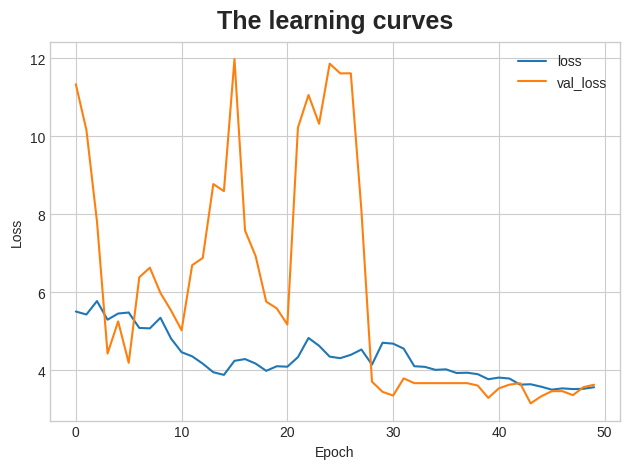

In [41]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('The learning curves')

In [42]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 

In [43]:
model_roc = model.predict(X_test)  # keras
model_roc_auc = roc_auc_score(y_test, model_roc)

47/47 [==============================] - 0s 3ms/step


In [44]:
fpr_net, tpr_net_lr, thresholds_net_lr = roc_curve(y_test, model_roc)

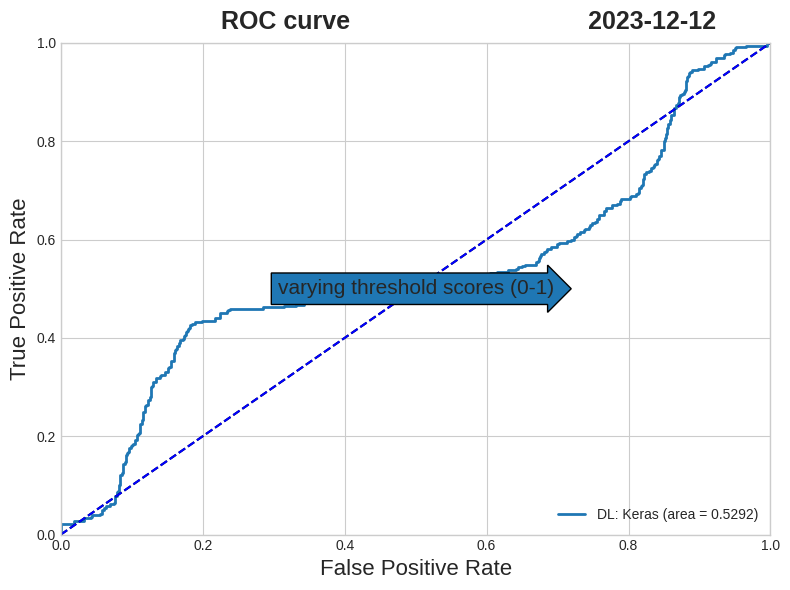

In [45]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_net, tpr_net_lr, label='DL: Keras (area = %0.4f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'b--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=15,ha="center", va="center",bbox=dict(boxstyle="rarrow")) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
now = strftime("%Y-%m-%d", gmtime())
plt.title(f'               ROC curve                                  {now}')
plt.legend(loc="lower right") 
plt.savefig('ROC_curves')
# Save the plot as a PNG file
plt.savefig('../images/roc_curve_dlkeras.png') 
plt.show()

#### This is for Tests!!!

In [46]:
# fake data - generated
df_test = pd.read_csv('../gendata/HR_COM1_fake_totest.csv', index_col=0)
df_test

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,dept,salary
0,0.06,0.12,6,155,8,0,1,0,3,0
1,0.73,0.51,5,144,8,1,0,0,2,0
2,0.75,0.99,4,284,4,0,1,0,5,1
3,0.59,0.95,6,272,9,0,1,1,6,1
4,0.29,0.17,7,113,3,0,0,1,6,1
...,...,...,...,...,...,...,...,...,...,...
99995,0.48,0.67,7,175,7,0,1,0,6,2
99996,0.76,0.25,4,234,6,0,1,0,3,1
99997,0.48,0.97,7,191,9,0,0,0,0,1
99998,0.14,0.65,7,262,4,1,0,1,2,1


In [47]:
df_test.shape

(100000, 10)

In [48]:
# Set the input X to the K-Means.
X = df_test.drop(columns=['turnover'])
y = df_test['turnover']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8, random_state=123, stratify=y, shuffle=True)

In [50]:
y_pred_xgb = xgb_model.predict(X_test)

In [51]:

metric_models('XGBClassifier Test', xgb_model, X_test, y_test, y_pred_xgb)

TypeError: metric_models() missing 1 required positional argument: 'dfmetrics'